In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# Load the dataset
data = pd.read_csv("C:/Users/Duma/Downloads/lawyers.csv")

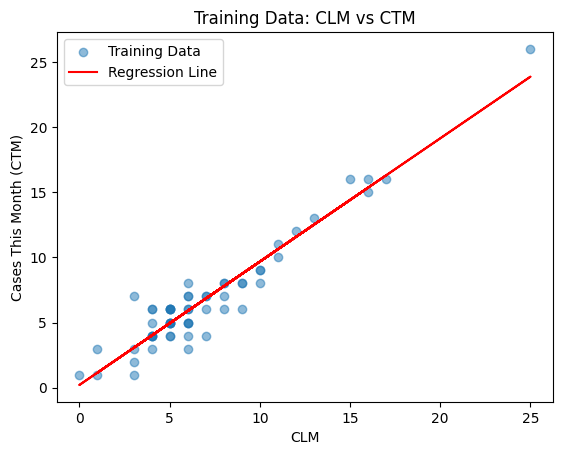

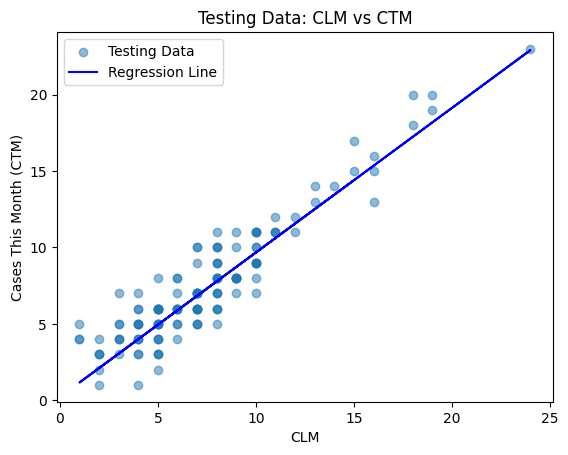

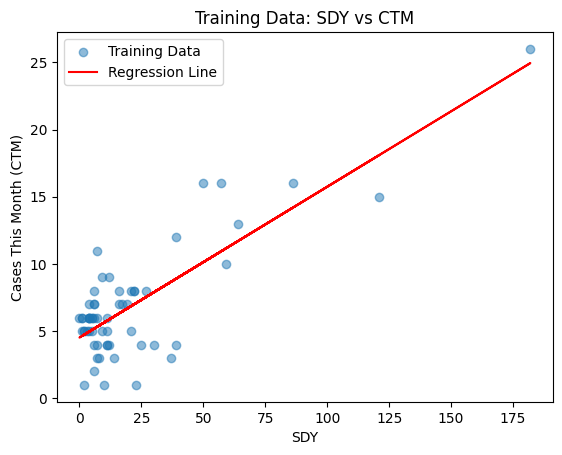

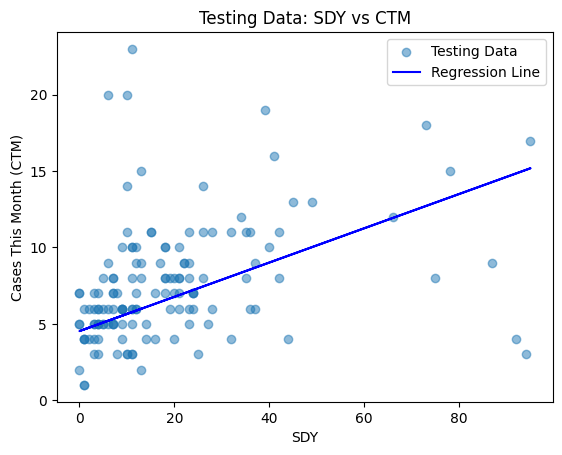

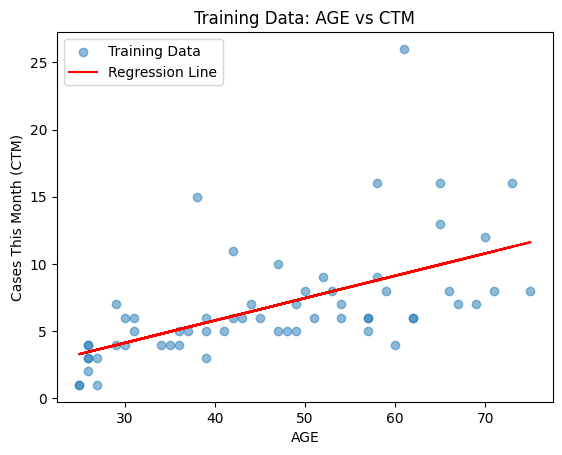

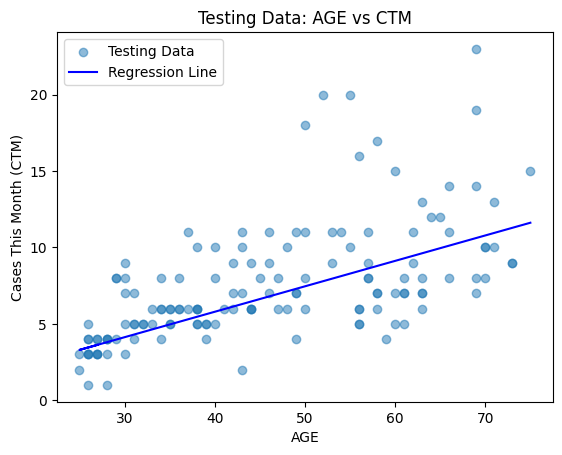

Predictor: CLM
Training R-squared: 0.9102906543211394
Coefficient: 0.9462601613708963
Intercept: 0.20861653975990802

Predictor: CLM
Testing R-squared: 0.8559554341960193

Predictor: SDY
Training R-squared: 0.6458218229831051
Coefficient: 0.11221569938341776
Intercept: 4.523725875932168

Predictor: SDY
Testing R-squared: 0.02836819864489082

Predictor: AGE
Training R-squared: 0.3295852210469228
Coefficient: 0.16657165807270757
Intercept: -0.873391547689998

Predictor: AGE
Testing R-squared: 0.31469744546393363



In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your data into a DataFrame
data = pd.read_csv("C:/Users/Duma/Downloads/lawyers.csv")

# Define predictor and response variables
predictors = ["CLM", "SDY", "AGE"]
target = "CTM"

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[target], test_size=0.7, random_state=42)

# Iterate over predictors
for predictor in predictors:
    # Training data
    X_train_predictor = sm.add_constant(X_train[predictor])  # Add a constant term to the predictor
    model_train = sm.OLS(y_train, X_train_predictor).fit()  # Fit the model
    predictions_train = model_train.predict(X_train_predictor)
    
    # Testing data
    X_test_predictor = sm.add_constant(X_test[predictor])  # Add a constant term to the predictor
    predictions_test = model_train.predict(X_test_predictor)
    
    # Plot training data
    plt.scatter(X_train[predictor], y_train, alpha=0.5, label='Training Data')
    plt.plot(X_train[predictor], predictions_train, color='red', label='Regression Line')
    plt.title(f'Training Data: {predictor} vs CTM')
    plt.xlabel(predictor)
    plt.ylabel('Cases This Month (CTM)')
    plt.legend()
    plt.show()
    
    # Plot testing data
    plt.scatter(X_test[predictor], y_test, alpha=0.5, label='Testing Data')
    plt.plot(X_test[predictor], predictions_test, color='blue', label='Regression Line')
    plt.title(f'Testing Data: {predictor} vs CTM')
    plt.xlabel(predictor)
    plt.ylabel('Cases This Month (CTM)')
    plt.legend()
    plt.show()

    # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[target], test_size=0.7, random_state=42)

# Iterate over predictors
for predictor in predictors:
    # Training data
    X_train_predictor = sm.add_constant(X_train[predictor])  # Add a constant term to the predictor
    model_train = sm.OLS(y_train, X_train_predictor).fit()  # Fit the model
    predictions_train = model_train.predict(X_train_predictor)
    
    # Testing data
    X_test_predictor = sm.add_constant(X_test[predictor])  # Add a constant term to the predictor
    predictions_test = model_train.predict(X_test_predictor)
    
    # Output regression results
    print(f"Predictor: {predictor}")
    print(f"Training R-squared: {model_train.rsquared}")
    print(f"Coefficient: {model_train.params[predictor]}")
    print(f"Intercept: {model_train.params['const']}")
    print()
    
    print(f"Predictor: {predictor}")
    print(f"Testing R-squared: {1 - np.sum((y_test - predictions_test)**2) / np.sum((y_test - np.mean(y_test))**2)}")
    print()

Training R-squared: 0.5080202336808441
Testing R-squared: 0.26822655383816074


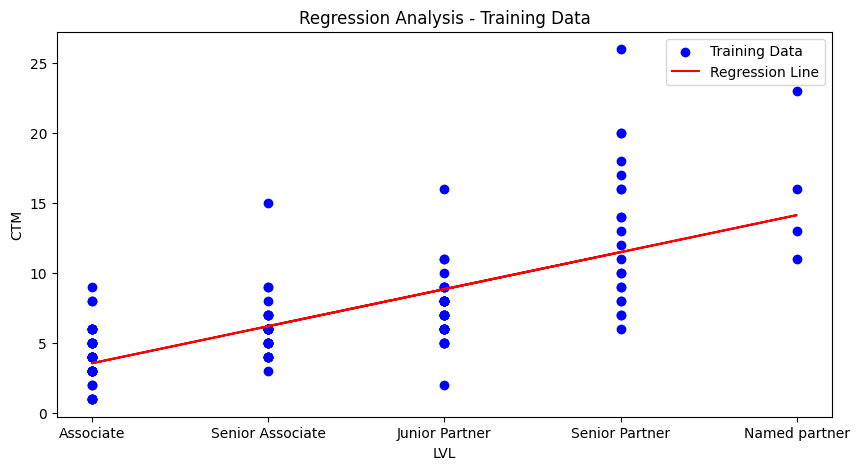

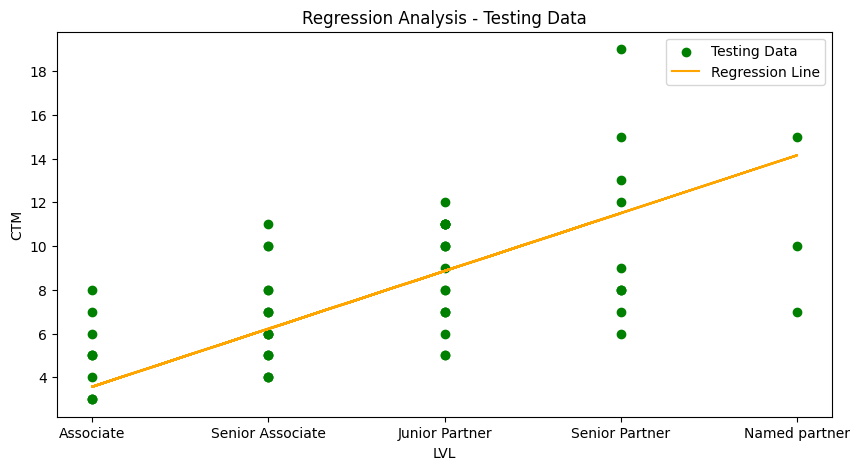

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = pd.read_csv("C:/Users/Duma/Downloads/lawyers.csv")

data['LVL'] = data['LVL'].map({
    'Associate': 1,
    'Senior Associate': 2,
    'Junior Partner': 3,
    'Senior Partner': 4,
    'Managing Partner': 5
})

X = data[['LVL']]  
y = data['CTM']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)

# Step 7: Plot scatter plots with regression line for training data
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, train_pred, color='red', label='Regression Line')
plt.xticks([1, 2, 3, 4, 5], ['Associate', 'Senior Associate', 'Junior Partner', 'Senior Partner', 'Named partner'])
plt.xlabel('LVL')
plt.ylabel('CTM')
plt.title('Regression Analysis - Training Data')
plt.legend()
plt.show()

# Step 8: Plot scatter plots with regression line for testing data
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, test_pred, color='orange', label='Regression Line')
plt.xticks([1, 2, 3, 4, 5], ['Associate', 'Senior Associate', 'Junior Partner', 'Senior Partner', 'Named partner'])
plt.xlabel('LVL')
plt.ylabel('CTM')
plt.title('Regression Analysis - Testing Data')
plt.legend()
plt.show()
